In [ ]:
!pip install --upgrade treecorr seaborn pandas --user 

In [49]:
import sys
sys.path.insert(0, "/global/homes/h/husni/.local/lib/python3.6/site-packages")

In [50]:
%pylab inline
import seaborn as sns;sns.set_style('darkgrid')
import pandas as pd
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = 19,14
sns.set_context('poster')

Populating the interactive namespace from numpy and matplotlib


In [8]:
import GCRCatalogs
from GCR import GCRQuery
# Load the object catalog
catalog = GCRCatalogs.load_catalog('cosmoDC2_v1.1.4')


In [52]:
import pandas as pd

In [54]:
df = pd.DataFrame(catalog.get_quantities(['ra', 'dec', 'redshift', 'shear1', 'shear2', 'mag_r']))
df.head()

,redshift,mag_r,ra,dec,shear1,shear2
0,0.022012,15.969118,62.584977,-40.334110,-0.0,-0.0
1,0.020724,19.318966,61.398620,-41.036142,-0.0,-0.0
2,0.020339,17.240576,61.024250,-39.783545,-0.0,-0.0
3,0.018407,17.741489,61.420014,-39.964448,-0.0,-0.0
4,0.021334,14.139737,61.869596,-40.907121,-0.0,-0.0


In [55]:
df2 = df[df['mag_r']<24]

In [66]:
len(df2)

2553591

In [68]:
import treecorr as tr

In [69]:
cat = tr.Catalog(g1=df2['shear1'], g2=df2['shear2'], ra=df2['ra'], dec=df2['dec'],
                 ra_units='degrees', dec_units='degrees')
min_sep = 0.01  # in degrees
max_sep = 2  # in degrees
nbins = 24  # number of bins

corr = tr.GGCorrelation(min_sep=min_sep, max_sep=max_sep,
                            nbins=nbins, sep_units='degrees')
corr.process(cat)

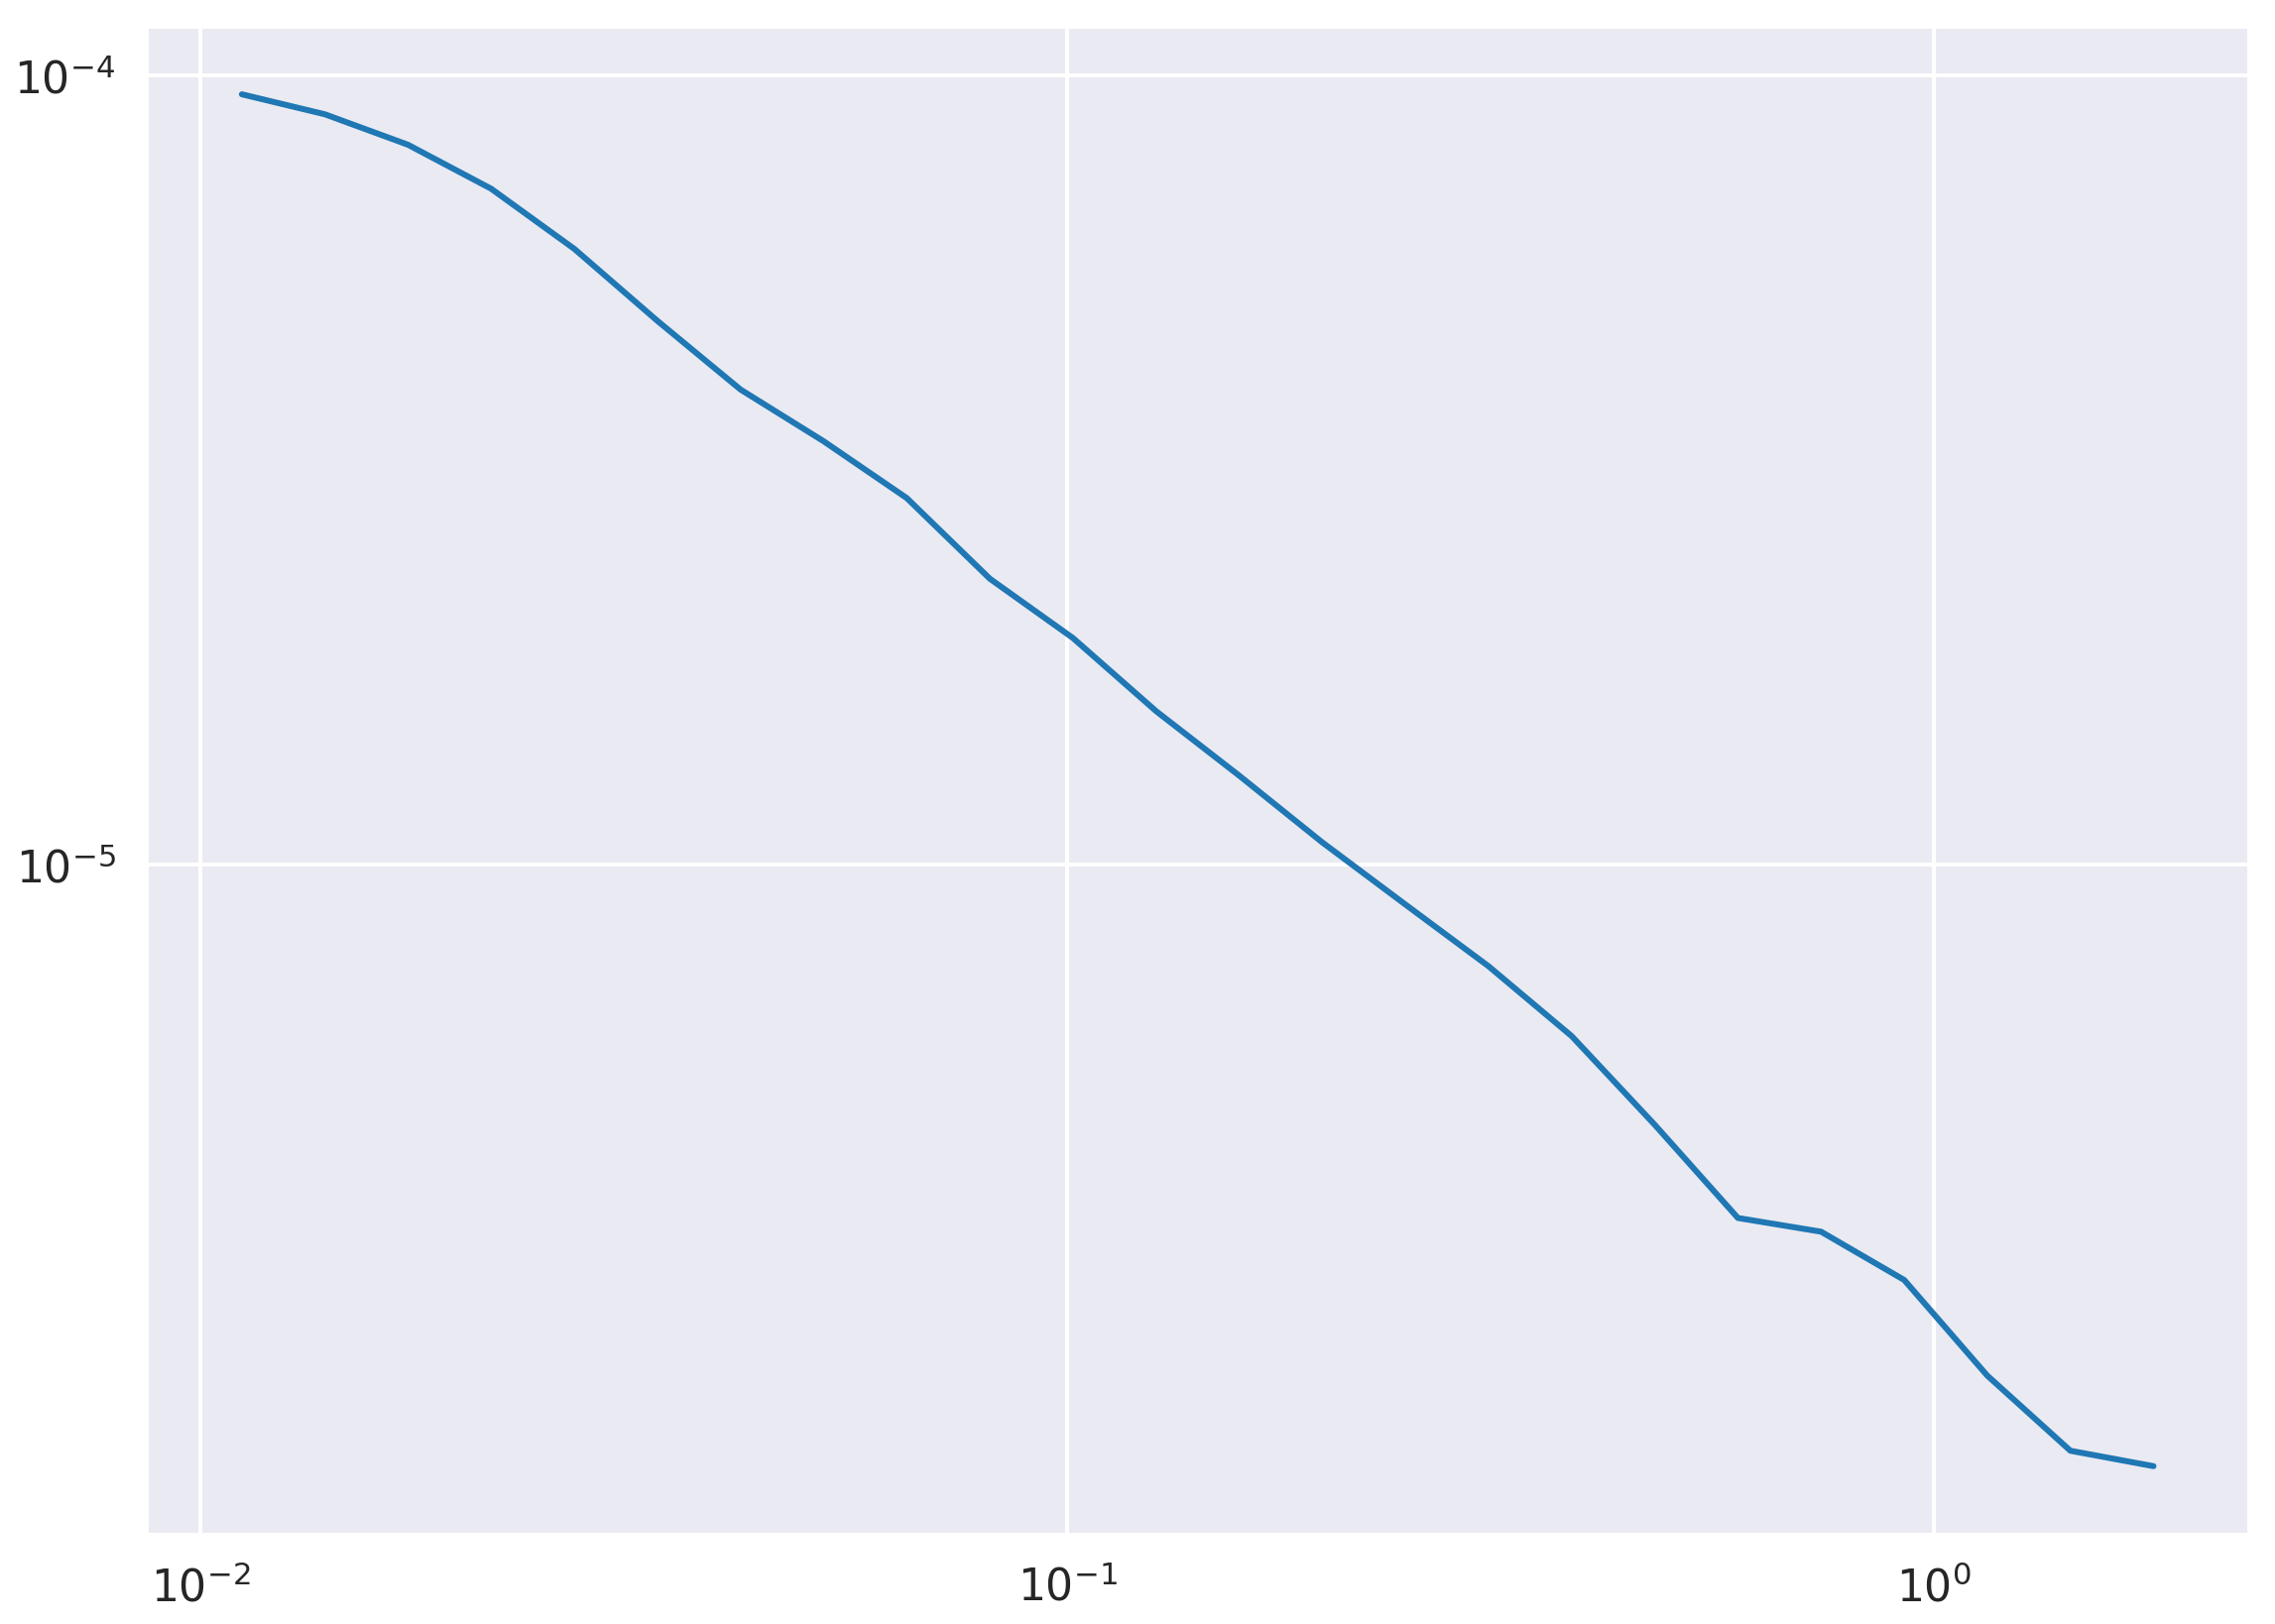

In [75]:
plt.plot(np.exp(corr.logr), corr.xip)
plt.xscale('log')
plt.yscale('log')